# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = '/input'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting mnist: 100%|██████████| 60.0K/60.0K [00:11<00:00, 5.37KFile/s]


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

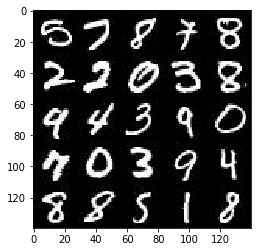

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

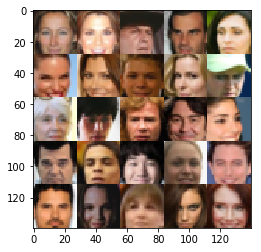

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.2.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    # TODO: Implement Function
    inputs_real=tf.placeholder(tf.float32, (None,image_width,image_height,image_channels),name='input_real')
    inputs_z=tf.placeholder(tf.float32,(None,z_dim),name='input_z')
    lr=tf.placeholder(tf.float32)
    

    return inputs_real, inputs_z, lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/usr/local/lib/python3.5/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/usr/local/lib/python3.5/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/usr/local/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/usr/local/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start\n    ioloop.IOLoop.instance().start()', 'File "/usr/local/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'F

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        alpha = 0.01
        # Input layer is 28x28x1
        x1 = tf.layers.conv2d(images, 64, 5, 2, 'same', activation=None)
        x1 = tf.maximum(alpha * x1, x1)
        #now is 14x14x64
        x2 = tf.layers.conv2d(x1, 128, 5, 2, 'same', activation=None)
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha * x2, x2)
        #now is 7x7x128
        
        flat=tf.reshape(x2,(-1,7*7*128))
        
        logits = tf.layers.dense(flat,1)
        out = tf.sigmoid(logits)
    
        
        return out, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [17]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse=(not is_train)):
        
        alpha=0.01
        
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        # covolution
        x1 = tf.reshape(x1,(-1,7,7,512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        #print(x1.get_shape().as_list())
        #now is 7x7x512
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same', activation=None)
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        
        # now is 14x14x256

        # Output layer
        logits = tf.layers.conv2d_transpose(x2, out_channel_dim, 5,strides=2, padding='same')
        #now is 28x28x out_channel_dim
        out = tf.tanh(logits)
    return out
    print(out)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
   

    g_model = generator(input_z, out_channel_dim,is_train=True)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
            d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
            g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [34]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    
    # TODO: Build Model
    out_channel_dim = data_shape[3]
    n_images = 20
   
    #inputs_real, input_z, lr = model_inputs(28.,28.,1., z_dim)
    inputs_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    
    d_loss, g_loss = model_loss(inputs_real, input_z, out_channel_dim)
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, lr, beta1)
   
    steps=0
    show_every=100
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps+=1
                batch_images*=2
                # Sample random noise for G
                #print(batch_images)
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={inputs_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_train_opt, feed_dict={inputs_real: batch_images, input_z: batch_z, lr: learning_rate})
        
                # At the end of each epoch, get the losses and print them out
                train_loss_d = sess.run(d_loss, {input_z: batch_z, inputs_real: batch_images})
                train_loss_g = g_loss.eval({input_z: batch_z}) 
         
                print("Epoch {}/{}...".format(epoch_i+1, epoch_count),"Discriminator Loss: {:.4f}...".format(train_loss_d), "Generator Loss: {:.4f}".format(train_loss_g)) 
               
                if steps % show_every == 0:
                    show_generator_output(sess, n_images, input_z, out_channel_dim, data_image_mode) 
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 3.5292... Generator Loss: 0.0309
Epoch 1/2... Discriminator Loss: 1.1815... Generator Loss: 0.3827
Epoch 1/2... Discriminator Loss: 0.3189... Generator Loss: 1.3345
Epoch 1/2... Discriminator Loss: 0.0316... Generator Loss: 4.6103
Epoch 1/2... Discriminator Loss: 0.0437... Generator Loss: 5.3584
Epoch 1/2... Discriminator Loss: 0.0528... Generator Loss: 4.0138
Epoch 1/2... Discriminator Loss: 0.0487... Generator Loss: 3.5538
Epoch 1/2... Discriminator Loss: 0.0654... Generator Loss: 3.1576
Epoch 1/2... Discriminator Loss: 0.0303... Generator Loss: 3.9224
Epoch 1/2... Discriminator Loss: 0.2245... Generator Loss: 1.7236
Epoch 1/2... Discriminator Loss: 0.0397... Generator Loss: 4.7507
Epoch 1/2... Discriminator Loss: 0.0379... Generator Loss: 4.7207
Epoch 1/2... Discriminator Loss: 0.0373... Generator Loss: 3.7299
Epoch 1/2... Discriminator Loss: 0.0283... Generator Loss: 4.2076
Epoch 1/2... Discriminator Loss: 0.0204... Generator Loss: 4.8145
Epoch 1/2.

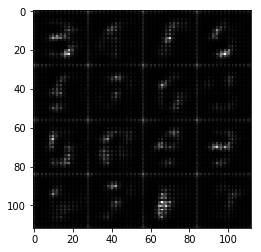

Epoch 1/2... Discriminator Loss: 1.4811... Generator Loss: 0.9286
Epoch 1/2... Discriminator Loss: 1.6182... Generator Loss: 0.5148
Epoch 1/2... Discriminator Loss: 1.1542... Generator Loss: 1.4332
Epoch 1/2... Discriminator Loss: 1.4516... Generator Loss: 0.5080
Epoch 1/2... Discriminator Loss: 1.4935... Generator Loss: 0.8534
Epoch 1/2... Discriminator Loss: 1.4935... Generator Loss: 0.7758
Epoch 1/2... Discriminator Loss: 1.4702... Generator Loss: 0.4629
Epoch 1/2... Discriminator Loss: 1.6311... Generator Loss: 1.1754
Epoch 1/2... Discriminator Loss: 1.9834... Generator Loss: 0.2772
Epoch 1/2... Discriminator Loss: 1.4439... Generator Loss: 2.0400
Epoch 1/2... Discriminator Loss: 1.8643... Generator Loss: 0.2622
Epoch 1/2... Discriminator Loss: 1.1796... Generator Loss: 1.4243
Epoch 1/2... Discriminator Loss: 1.2820... Generator Loss: 0.7846
Epoch 1/2... Discriminator Loss: 1.6872... Generator Loss: 0.4197
Epoch 1/2... Discriminator Loss: 1.5533... Generator Loss: 1.6223
Epoch 1/2.

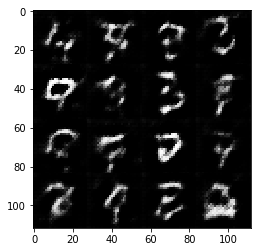

Epoch 1/2... Discriminator Loss: 1.3245... Generator Loss: 0.5089
Epoch 1/2... Discriminator Loss: 1.2511... Generator Loss: 0.7488
Epoch 1/2... Discriminator Loss: 1.3074... Generator Loss: 0.9355
Epoch 1/2... Discriminator Loss: 1.4491... Generator Loss: 0.4381
Epoch 1/2... Discriminator Loss: 1.2776... Generator Loss: 0.9220
Epoch 1/2... Discriminator Loss: 1.3365... Generator Loss: 0.7297
Epoch 1/2... Discriminator Loss: 1.2448... Generator Loss: 0.5774
Epoch 1/2... Discriminator Loss: 1.3806... Generator Loss: 0.8408
Epoch 1/2... Discriminator Loss: 1.3544... Generator Loss: 0.5788
Epoch 1/2... Discriminator Loss: 1.2495... Generator Loss: 0.8184
Epoch 1/2... Discriminator Loss: 1.2347... Generator Loss: 0.7718
Epoch 1/2... Discriminator Loss: 1.3881... Generator Loss: 0.5744
Epoch 1/2... Discriminator Loss: 1.3310... Generator Loss: 1.1388
Epoch 1/2... Discriminator Loss: 1.8787... Generator Loss: 0.2321
Epoch 1/2... Discriminator Loss: 1.7749... Generator Loss: 1.8680
Epoch 1/2.

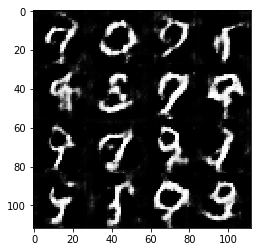

Epoch 1/2... Discriminator Loss: 1.4428... Generator Loss: 1.2314
Epoch 1/2... Discriminator Loss: 1.4639... Generator Loss: 0.3681
Epoch 1/2... Discriminator Loss: 1.2001... Generator Loss: 1.1873
Epoch 1/2... Discriminator Loss: 1.4008... Generator Loss: 0.4594
Epoch 1/2... Discriminator Loss: 1.1059... Generator Loss: 1.0410
Epoch 1/2... Discriminator Loss: 1.3063... Generator Loss: 0.5926
Epoch 1/2... Discriminator Loss: 1.1567... Generator Loss: 1.1772
Epoch 1/2... Discriminator Loss: 1.4204... Generator Loss: 0.4236
Epoch 1/2... Discriminator Loss: 1.4070... Generator Loss: 0.9110
Epoch 1/2... Discriminator Loss: 1.3980... Generator Loss: 0.5532
Epoch 1/2... Discriminator Loss: 1.1987... Generator Loss: 1.1159
Epoch 1/2... Discriminator Loss: 1.2489... Generator Loss: 0.5096
Epoch 1/2... Discriminator Loss: 1.2428... Generator Loss: 1.3216
Epoch 1/2... Discriminator Loss: 1.4554... Generator Loss: 0.3476
Epoch 1/2... Discriminator Loss: 1.4552... Generator Loss: 1.7168
Epoch 1/2.

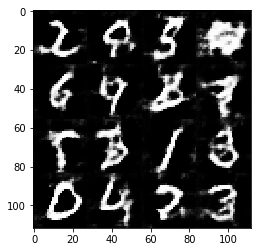

Epoch 1/2... Discriminator Loss: 1.2358... Generator Loss: 1.1095
Epoch 1/2... Discriminator Loss: 1.5078... Generator Loss: 0.3653
Epoch 1/2... Discriminator Loss: 1.4850... Generator Loss: 1.2378
Epoch 1/2... Discriminator Loss: 1.5871... Generator Loss: 0.3291
Epoch 1/2... Discriminator Loss: 1.4641... Generator Loss: 1.3843
Epoch 1/2... Discriminator Loss: 1.4981... Generator Loss: 0.3536
Epoch 1/2... Discriminator Loss: 1.3472... Generator Loss: 1.1899
Epoch 1/2... Discriminator Loss: 1.3095... Generator Loss: 0.4773
Epoch 1/2... Discriminator Loss: 1.1930... Generator Loss: 0.9981
Epoch 1/2... Discriminator Loss: 1.2930... Generator Loss: 0.5148
Epoch 1/2... Discriminator Loss: 1.3269... Generator Loss: 0.7312
Epoch 1/2... Discriminator Loss: 1.2390... Generator Loss: 0.6617
Epoch 1/2... Discriminator Loss: 1.2204... Generator Loss: 0.6856
Epoch 1/2... Discriminator Loss: 1.2553... Generator Loss: 0.7119
Epoch 1/2... Discriminator Loss: 1.4221... Generator Loss: 0.5142
Epoch 1/2.

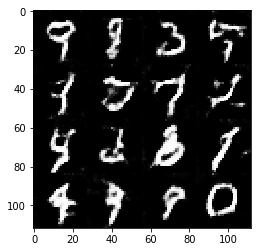

Epoch 1/2... Discriminator Loss: 1.4672... Generator Loss: 0.3523
Epoch 1/2... Discriminator Loss: 1.3305... Generator Loss: 1.6814
Epoch 1/2... Discriminator Loss: 1.5511... Generator Loss: 0.3246
Epoch 1/2... Discriminator Loss: 1.1852... Generator Loss: 1.3562
Epoch 1/2... Discriminator Loss: 1.4106... Generator Loss: 0.4142
Epoch 1/2... Discriminator Loss: 0.9949... Generator Loss: 1.2203
Epoch 1/2... Discriminator Loss: 1.1621... Generator Loss: 0.6401
Epoch 1/2... Discriminator Loss: 1.1221... Generator Loss: 0.7443
Epoch 1/2... Discriminator Loss: 1.0949... Generator Loss: 0.8429
Epoch 1/2... Discriminator Loss: 1.2584... Generator Loss: 0.5935
Epoch 1/2... Discriminator Loss: 1.1843... Generator Loss: 0.7586
Epoch 1/2... Discriminator Loss: 1.1761... Generator Loss: 0.6881
Epoch 1/2... Discriminator Loss: 1.3258... Generator Loss: 0.5573
Epoch 1/2... Discriminator Loss: 1.3522... Generator Loss: 0.8319
Epoch 1/2... Discriminator Loss: 1.4717... Generator Loss: 0.4130
Epoch 1/2.

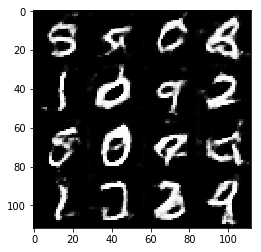

Epoch 1/2... Discriminator Loss: 1.2448... Generator Loss: 0.6989
Epoch 1/2... Discriminator Loss: 1.1717... Generator Loss: 0.9696
Epoch 1/2... Discriminator Loss: 1.2950... Generator Loss: 0.4516
Epoch 1/2... Discriminator Loss: 1.4232... Generator Loss: 1.1796
Epoch 1/2... Discriminator Loss: 1.6538... Generator Loss: 0.2635
Epoch 1/2... Discriminator Loss: 1.2088... Generator Loss: 1.2875
Epoch 1/2... Discriminator Loss: 1.1829... Generator Loss: 0.7521
Epoch 1/2... Discriminator Loss: 1.4580... Generator Loss: 0.3829
Epoch 1/2... Discriminator Loss: 1.3774... Generator Loss: 1.3669
Epoch 1/2... Discriminator Loss: 1.3344... Generator Loss: 0.4166
Epoch 1/2... Discriminator Loss: 1.1281... Generator Loss: 0.8269
Epoch 1/2... Discriminator Loss: 1.1673... Generator Loss: 0.8128
Epoch 1/2... Discriminator Loss: 1.3232... Generator Loss: 0.5062
Epoch 1/2... Discriminator Loss: 1.2598... Generator Loss: 0.7821
Epoch 1/2... Discriminator Loss: 1.3158... Generator Loss: 0.4413
Epoch 1/2.

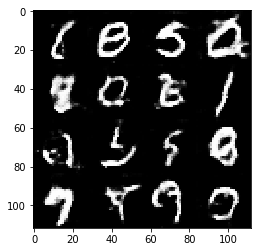

Epoch 1/2... Discriminator Loss: 1.2121... Generator Loss: 0.5040
Epoch 1/2... Discriminator Loss: 1.0987... Generator Loss: 1.0407
Epoch 1/2... Discriminator Loss: 1.2210... Generator Loss: 0.4662
Epoch 1/2... Discriminator Loss: 1.2182... Generator Loss: 1.4271
Epoch 1/2... Discriminator Loss: 1.6290... Generator Loss: 0.2976
Epoch 1/2... Discriminator Loss: 1.4063... Generator Loss: 1.6032
Epoch 1/2... Discriminator Loss: 1.4173... Generator Loss: 0.3663
Epoch 1/2... Discriminator Loss: 1.2367... Generator Loss: 1.1507
Epoch 1/2... Discriminator Loss: 1.1499... Generator Loss: 0.5418
Epoch 1/2... Discriminator Loss: 1.1505... Generator Loss: 0.8614
Epoch 1/2... Discriminator Loss: 1.1311... Generator Loss: 0.6668
Epoch 1/2... Discriminator Loss: 1.1511... Generator Loss: 0.6897
Epoch 1/2... Discriminator Loss: 1.1828... Generator Loss: 0.9091
Epoch 1/2... Discriminator Loss: 1.1904... Generator Loss: 0.5049
Epoch 1/2... Discriminator Loss: 1.1737... Generator Loss: 1.1574
Epoch 1/2.

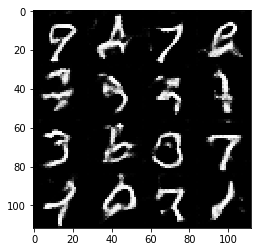

Epoch 1/2... Discriminator Loss: 1.8164... Generator Loss: 0.2323
Epoch 1/2... Discriminator Loss: 1.3978... Generator Loss: 2.6293
Epoch 1/2... Discriminator Loss: 1.8087... Generator Loss: 0.2354
Epoch 1/2... Discriminator Loss: 0.9397... Generator Loss: 1.7307
Epoch 1/2... Discriminator Loss: 1.2730... Generator Loss: 0.5874
Epoch 1/2... Discriminator Loss: 1.0920... Generator Loss: 0.7063
Epoch 1/2... Discriminator Loss: 0.9747... Generator Loss: 1.2545
Epoch 1/2... Discriminator Loss: 1.4334... Generator Loss: 0.4628
Epoch 1/2... Discriminator Loss: 1.0234... Generator Loss: 0.8711
Epoch 1/2... Discriminator Loss: 0.9238... Generator Loss: 1.1609
Epoch 1/2... Discriminator Loss: 1.3838... Generator Loss: 0.4232
Epoch 1/2... Discriminator Loss: 1.0391... Generator Loss: 1.2899
Epoch 1/2... Discriminator Loss: 1.2241... Generator Loss: 0.5436
Epoch 1/2... Discriminator Loss: 1.0872... Generator Loss: 0.8985
Epoch 1/2... Discriminator Loss: 1.1866... Generator Loss: 0.5564
Epoch 1/2.

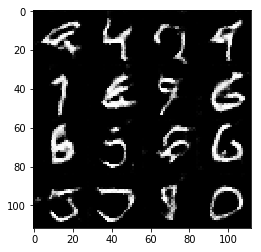

Epoch 1/2... Discriminator Loss: 0.6565... Generator Loss: 1.6453
Epoch 1/2... Discriminator Loss: 1.1106... Generator Loss: 0.5701
Epoch 1/2... Discriminator Loss: 1.1082... Generator Loss: 1.6027
Epoch 1/2... Discriminator Loss: 1.4601... Generator Loss: 0.3523
Epoch 1/2... Discriminator Loss: 1.2267... Generator Loss: 1.8329
Epoch 1/2... Discriminator Loss: 1.7525... Generator Loss: 0.2507
Epoch 1/2... Discriminator Loss: 1.2362... Generator Loss: 1.5742
Epoch 1/2... Discriminator Loss: 1.6031... Generator Loss: 0.2956
Epoch 1/2... Discriminator Loss: 1.2871... Generator Loss: 1.7582
Epoch 1/2... Discriminator Loss: 1.6691... Generator Loss: 0.2679
Epoch 1/2... Discriminator Loss: 1.0047... Generator Loss: 1.2316
Epoch 1/2... Discriminator Loss: 1.0771... Generator Loss: 0.6769
Epoch 1/2... Discriminator Loss: 1.0155... Generator Loss: 0.7717
Epoch 1/2... Discriminator Loss: 1.0332... Generator Loss: 0.8473
Epoch 1/2... Discriminator Loss: 1.4710... Generator Loss: 0.3990
Epoch 1/2.

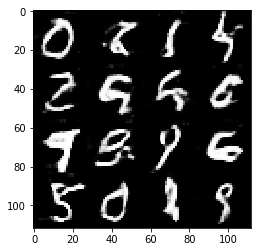

Epoch 2/2... Discriminator Loss: 1.1428... Generator Loss: 0.9450
Epoch 2/2... Discriminator Loss: 1.2731... Generator Loss: 0.4722
Epoch 2/2... Discriminator Loss: 1.0658... Generator Loss: 1.1351
Epoch 2/2... Discriminator Loss: 1.4828... Generator Loss: 0.3613
Epoch 2/2... Discriminator Loss: 1.2189... Generator Loss: 1.5240
Epoch 2/2... Discriminator Loss: 1.2587... Generator Loss: 0.5312
Epoch 2/2... Discriminator Loss: 1.0010... Generator Loss: 0.8055
Epoch 2/2... Discriminator Loss: 1.0269... Generator Loss: 0.9005
Epoch 2/2... Discriminator Loss: 1.1973... Generator Loss: 0.5764
Epoch 2/2... Discriminator Loss: 1.1069... Generator Loss: 0.7479
Epoch 2/2... Discriminator Loss: 1.1077... Generator Loss: 0.6325
Epoch 2/2... Discriminator Loss: 1.1824... Generator Loss: 0.7108
Epoch 2/2... Discriminator Loss: 0.9892... Generator Loss: 0.7347
Epoch 2/2... Discriminator Loss: 0.9408... Generator Loss: 0.9112
Epoch 2/2... Discriminator Loss: 1.1611... Generator Loss: 0.5468
Epoch 2/2.

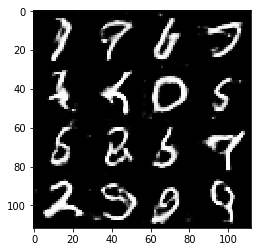

Epoch 2/2... Discriminator Loss: 1.3798... Generator Loss: 0.3927
Epoch 2/2... Discriminator Loss: 1.0246... Generator Loss: 0.9699
Epoch 2/2... Discriminator Loss: 1.0005... Generator Loss: 0.7345
Epoch 2/2... Discriminator Loss: 1.1238... Generator Loss: 0.7184
Epoch 2/2... Discriminator Loss: 1.0394... Generator Loss: 0.8806
Epoch 2/2... Discriminator Loss: 1.0322... Generator Loss: 0.6866
Epoch 2/2... Discriminator Loss: 1.2053... Generator Loss: 0.5658
Epoch 2/2... Discriminator Loss: 1.1637... Generator Loss: 0.9315
Epoch 2/2... Discriminator Loss: 1.5367... Generator Loss: 0.3173
Epoch 2/2... Discriminator Loss: 1.0599... Generator Loss: 1.4516
Epoch 2/2... Discriminator Loss: 1.1468... Generator Loss: 0.5445
Epoch 2/2... Discriminator Loss: 1.1917... Generator Loss: 0.7069
Epoch 2/2... Discriminator Loss: 0.9733... Generator Loss: 0.8359
Epoch 2/2... Discriminator Loss: 1.1581... Generator Loss: 0.6184
Epoch 2/2... Discriminator Loss: 1.0085... Generator Loss: 1.0618
Epoch 2/2.

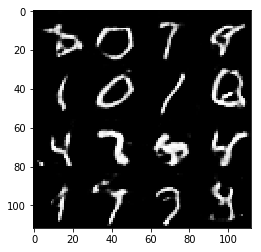

Epoch 2/2... Discriminator Loss: 1.2626... Generator Loss: 1.3583
Epoch 2/2... Discriminator Loss: 1.7419... Generator Loss: 0.2408
Epoch 2/2... Discriminator Loss: 1.2340... Generator Loss: 1.8158
Epoch 2/2... Discriminator Loss: 1.1325... Generator Loss: 0.6299
Epoch 2/2... Discriminator Loss: 1.0276... Generator Loss: 0.7420
Epoch 2/2... Discriminator Loss: 0.9727... Generator Loss: 1.1096
Epoch 2/2... Discriminator Loss: 1.2079... Generator Loss: 0.5515
Epoch 2/2... Discriminator Loss: 1.3470... Generator Loss: 0.5742
Epoch 2/2... Discriminator Loss: 1.1533... Generator Loss: 0.9098
Epoch 2/2... Discriminator Loss: 1.5854... Generator Loss: 0.2869
Epoch 2/2... Discriminator Loss: 1.5077... Generator Loss: 2.3241
Epoch 2/2... Discriminator Loss: 1.4082... Generator Loss: 0.3945
Epoch 2/2... Discriminator Loss: 1.0710... Generator Loss: 1.1254
Epoch 2/2... Discriminator Loss: 1.0572... Generator Loss: 0.6713
Epoch 2/2... Discriminator Loss: 1.0395... Generator Loss: 0.7897
Epoch 2/2.

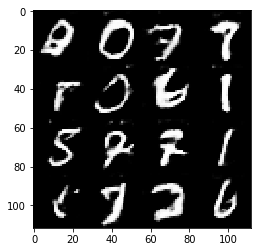

Epoch 2/2... Discriminator Loss: 1.4730... Generator Loss: 2.3815
Epoch 2/2... Discriminator Loss: 1.5289... Generator Loss: 0.3363
Epoch 2/2... Discriminator Loss: 0.9152... Generator Loss: 1.1274
Epoch 2/2... Discriminator Loss: 0.9528... Generator Loss: 1.0304
Epoch 2/2... Discriminator Loss: 1.0479... Generator Loss: 0.9307
Epoch 2/2... Discriminator Loss: 1.2302... Generator Loss: 0.4807
Epoch 2/2... Discriminator Loss: 0.9224... Generator Loss: 1.2091
Epoch 2/2... Discriminator Loss: 1.1694... Generator Loss: 0.6252
Epoch 2/2... Discriminator Loss: 1.0460... Generator Loss: 0.8325
Epoch 2/2... Discriminator Loss: 1.2928... Generator Loss: 0.5103
Epoch 2/2... Discriminator Loss: 1.0677... Generator Loss: 1.0373
Epoch 2/2... Discriminator Loss: 1.1799... Generator Loss: 0.6291
Epoch 2/2... Discriminator Loss: 1.2259... Generator Loss: 0.6596
Epoch 2/2... Discriminator Loss: 0.9534... Generator Loss: 1.0054
Epoch 2/2... Discriminator Loss: 1.4650... Generator Loss: 0.3767
Epoch 2/2.

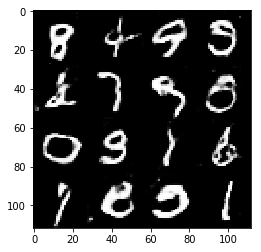

Epoch 2/2... Discriminator Loss: 0.8561... Generator Loss: 1.3227
Epoch 2/2... Discriminator Loss: 1.5793... Generator Loss: 0.2875
Epoch 2/2... Discriminator Loss: 1.0591... Generator Loss: 1.9800
Epoch 2/2... Discriminator Loss: 1.3796... Generator Loss: 0.3948
Epoch 2/2... Discriminator Loss: 0.9541... Generator Loss: 1.4404
Epoch 2/2... Discriminator Loss: 1.3556... Generator Loss: 0.4331
Epoch 2/2... Discriminator Loss: 0.8618... Generator Loss: 1.1788
Epoch 2/2... Discriminator Loss: 1.0352... Generator Loss: 0.6031
Epoch 2/2... Discriminator Loss: 0.7751... Generator Loss: 1.3190
Epoch 2/2... Discriminator Loss: 1.6793... Generator Loss: 0.2652
Epoch 2/2... Discriminator Loss: 1.4319... Generator Loss: 2.6956
Epoch 2/2... Discriminator Loss: 1.8812... Generator Loss: 0.2332
Epoch 2/2... Discriminator Loss: 1.2173... Generator Loss: 1.6805
Epoch 2/2... Discriminator Loss: 1.4165... Generator Loss: 0.3554
Epoch 2/2... Discriminator Loss: 1.1968... Generator Loss: 2.0443
Epoch 2/2.

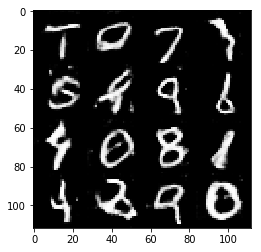

Epoch 2/2... Discriminator Loss: 1.0422... Generator Loss: 0.6802
Epoch 2/2... Discriminator Loss: 0.9132... Generator Loss: 1.2310
Epoch 2/2... Discriminator Loss: 1.3860... Generator Loss: 0.4168
Epoch 2/2... Discriminator Loss: 1.1898... Generator Loss: 1.3803
Epoch 2/2... Discriminator Loss: 1.1650... Generator Loss: 0.5643
Epoch 2/2... Discriminator Loss: 1.1400... Generator Loss: 0.8074
Epoch 2/2... Discriminator Loss: 0.8798... Generator Loss: 1.0554
Epoch 2/2... Discriminator Loss: 1.2555... Generator Loss: 0.4823
Epoch 2/2... Discriminator Loss: 0.9359... Generator Loss: 1.5109
Epoch 2/2... Discriminator Loss: 0.9763... Generator Loss: 0.7287
Epoch 2/2... Discriminator Loss: 0.9558... Generator Loss: 0.8023
Epoch 2/2... Discriminator Loss: 0.9181... Generator Loss: 0.8957
Epoch 2/2... Discriminator Loss: 0.8089... Generator Loss: 1.0413
Epoch 2/2... Discriminator Loss: 0.9312... Generator Loss: 0.8831
Epoch 2/2... Discriminator Loss: 1.0509... Generator Loss: 0.7403
Epoch 2/2.

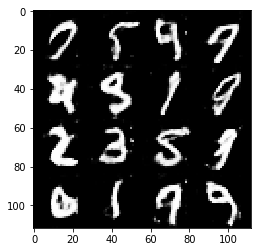

Epoch 2/2... Discriminator Loss: 1.2217... Generator Loss: 2.3063
Epoch 2/2... Discriminator Loss: 1.3952... Generator Loss: 0.4308
Epoch 2/2... Discriminator Loss: 0.8243... Generator Loss: 1.1191
Epoch 2/2... Discriminator Loss: 0.9880... Generator Loss: 0.8678
Epoch 2/2... Discriminator Loss: 1.2887... Generator Loss: 0.4900
Epoch 2/2... Discriminator Loss: 0.8960... Generator Loss: 1.2052
Epoch 2/2... Discriminator Loss: 1.3632... Generator Loss: 0.4050
Epoch 2/2... Discriminator Loss: 1.0881... Generator Loss: 1.3602
Epoch 2/2... Discriminator Loss: 1.7120... Generator Loss: 0.2554
Epoch 2/2... Discriminator Loss: 1.0389... Generator Loss: 2.1501
Epoch 2/2... Discriminator Loss: 1.2279... Generator Loss: 0.4935
Epoch 2/2... Discriminator Loss: 1.0471... Generator Loss: 1.2333
Epoch 2/2... Discriminator Loss: 1.1803... Generator Loss: 0.6021
Epoch 2/2... Discriminator Loss: 0.9594... Generator Loss: 0.7975
Epoch 2/2... Discriminator Loss: 0.9007... Generator Loss: 0.9227
Epoch 2/2.

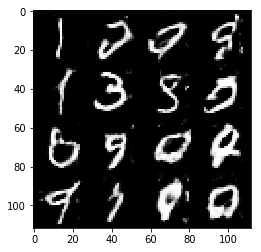

Epoch 2/2... Discriminator Loss: 1.0336... Generator Loss: 1.2021
Epoch 2/2... Discriminator Loss: 1.5561... Generator Loss: 0.3671
Epoch 2/2... Discriminator Loss: 0.7380... Generator Loss: 2.5143
Epoch 2/2... Discriminator Loss: 0.9388... Generator Loss: 0.7758
Epoch 2/2... Discriminator Loss: 0.8385... Generator Loss: 1.0684
Epoch 2/2... Discriminator Loss: 1.0692... Generator Loss: 0.7528
Epoch 2/2... Discriminator Loss: 0.8995... Generator Loss: 0.9558
Epoch 2/2... Discriminator Loss: 0.9437... Generator Loss: 0.7489
Epoch 2/2... Discriminator Loss: 0.9173... Generator Loss: 0.9513
Epoch 2/2... Discriminator Loss: 1.8792... Generator Loss: 0.2161
Epoch 2/2... Discriminator Loss: 1.5613... Generator Loss: 2.7203
Epoch 2/2... Discriminator Loss: 1.5248... Generator Loss: 0.3261
Epoch 2/2... Discriminator Loss: 0.9237... Generator Loss: 0.9399
Epoch 2/2... Discriminator Loss: 0.9089... Generator Loss: 1.1796
Epoch 2/2... Discriminator Loss: 1.2159... Generator Loss: 0.5198
Epoch 2/2.

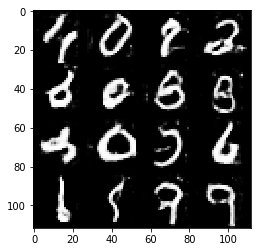

Epoch 2/2... Discriminator Loss: 0.9487... Generator Loss: 1.1031
Epoch 2/2... Discriminator Loss: 1.3014... Generator Loss: 0.4465
Epoch 2/2... Discriminator Loss: 1.0541... Generator Loss: 1.2965
Epoch 2/2... Discriminator Loss: 1.2319... Generator Loss: 0.5118
Epoch 2/2... Discriminator Loss: 0.9439... Generator Loss: 1.5069
Epoch 2/2... Discriminator Loss: 1.1914... Generator Loss: 0.5079
Epoch 2/2... Discriminator Loss: 1.0813... Generator Loss: 1.3460
Epoch 2/2... Discriminator Loss: 1.1040... Generator Loss: 0.5440
Epoch 2/2... Discriminator Loss: 0.8964... Generator Loss: 1.0001
Epoch 2/2... Discriminator Loss: 0.8443... Generator Loss: 1.2376
Epoch 2/2... Discriminator Loss: 1.2796... Generator Loss: 0.4465
Epoch 2/2... Discriminator Loss: 1.0397... Generator Loss: 1.1724
Epoch 2/2... Discriminator Loss: 1.3230... Generator Loss: 0.5094
Epoch 2/2... Discriminator Loss: 1.2565... Generator Loss: 0.7635
Epoch 2/2... Discriminator Loss: 1.1723... Generator Loss: 0.6123
Epoch 2/2.

In [38]:
batch_size = 64
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 2.0179... Generator Loss: 0.1959
Epoch 1/1... Discriminator Loss: 0.4413... Generator Loss: 2.5438
Epoch 1/1... Discriminator Loss: 0.5320... Generator Loss: 1.0833
Epoch 1/1... Discriminator Loss: 0.2017... Generator Loss: 2.6839
Epoch 1/1... Discriminator Loss: 0.5984... Generator Loss: 1.0236
Epoch 1/1... Discriminator Loss: 0.0957... Generator Loss: 4.1214
Epoch 1/1... Discriminator Loss: 0.2002... Generator Loss: 2.2174
Epoch 1/1... Discriminator Loss: 0.2461... Generator Loss: 2.0937
Epoch 1/1... Discriminator Loss: 0.0894... Generator Loss: 3.7278
Epoch 1/1... Discriminator Loss: 0.1520... Generator Loss: 2.5157
Epoch 1/1... Discriminator Loss: 0.1486... Generator Loss: 2.6576
Epoch 1/1... Discriminator Loss: 0.2116... Generator Loss: 2.2567
Epoch 1/1... Discriminator Loss: 0.0788... Generator Loss: 5.6796
Epoch 1/1... Discriminator Loss: 0.0782... Generator Loss: 3.4879
Epoch 1/1... Discriminator Loss: 0.2924... Generator Loss: 1.7226
Epoch 1/1.

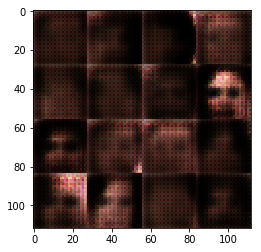

Epoch 1/1... Discriminator Loss: 1.6652... Generator Loss: 4.3599
Epoch 1/1... Discriminator Loss: 0.8002... Generator Loss: 0.9416
Epoch 1/1... Discriminator Loss: 1.0898... Generator Loss: 0.6135
Epoch 1/1... Discriminator Loss: 0.8965... Generator Loss: 1.9260
Epoch 1/1... Discriminator Loss: 0.9385... Generator Loss: 0.9587
Epoch 1/1... Discriminator Loss: 0.3007... Generator Loss: 3.3076
Epoch 1/1... Discriminator Loss: 0.5075... Generator Loss: 1.5112
Epoch 1/1... Discriminator Loss: 0.2583... Generator Loss: 3.3133
Epoch 1/1... Discriminator Loss: 2.0242... Generator Loss: 0.2633
Epoch 1/1... Discriminator Loss: 2.3150... Generator Loss: 4.4324
Epoch 1/1... Discriminator Loss: 1.8281... Generator Loss: 0.2881
Epoch 1/1... Discriminator Loss: 1.3306... Generator Loss: 1.0006
Epoch 1/1... Discriminator Loss: 1.1173... Generator Loss: 1.2093
Epoch 1/1... Discriminator Loss: 1.4894... Generator Loss: 0.4178
Epoch 1/1... Discriminator Loss: 1.1131... Generator Loss: 5.9785
Epoch 1/1.

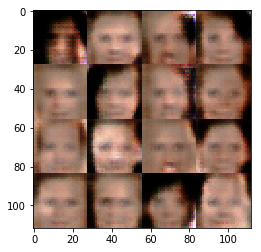

Epoch 1/1... Discriminator Loss: 1.2428... Generator Loss: 1.7703
Epoch 1/1... Discriminator Loss: 1.0996... Generator Loss: 0.6537
Epoch 1/1... Discriminator Loss: 1.0473... Generator Loss: 1.3653
Epoch 1/1... Discriminator Loss: 1.2476... Generator Loss: 0.4776
Epoch 1/1... Discriminator Loss: 1.4245... Generator Loss: 3.5328
Epoch 1/1... Discriminator Loss: 0.9488... Generator Loss: 0.6008
Epoch 1/1... Discriminator Loss: 0.7644... Generator Loss: 2.4693
Epoch 1/1... Discriminator Loss: 0.2243... Generator Loss: 4.0265
Epoch 1/1... Discriminator Loss: 1.5894... Generator Loss: 0.3380
Epoch 1/1... Discriminator Loss: 0.5764... Generator Loss: 5.1642
Epoch 1/1... Discriminator Loss: 1.0837... Generator Loss: 0.6193
Epoch 1/1... Discriminator Loss: 0.7275... Generator Loss: 2.3166
Epoch 1/1... Discriminator Loss: 0.7030... Generator Loss: 1.0999
Epoch 1/1... Discriminator Loss: 1.5207... Generator Loss: 0.4488
Epoch 1/1... Discriminator Loss: 1.3078... Generator Loss: 2.3068
Epoch 1/1.

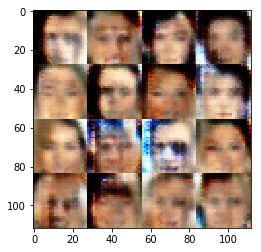

Epoch 1/1... Discriminator Loss: 1.1346... Generator Loss: 0.9563
Epoch 1/1... Discriminator Loss: 0.5513... Generator Loss: 3.9434
Epoch 1/1... Discriminator Loss: 1.8699... Generator Loss: 0.2648
Epoch 1/1... Discriminator Loss: 1.0818... Generator Loss: 0.8418
Epoch 1/1... Discriminator Loss: 0.8770... Generator Loss: 2.4035
Epoch 1/1... Discriminator Loss: 1.9568... Generator Loss: 0.2075
Epoch 1/1... Discriminator Loss: 1.0088... Generator Loss: 1.1822
Epoch 1/1... Discriminator Loss: 0.5457... Generator Loss: 3.8961
Epoch 1/1... Discriminator Loss: 0.7277... Generator Loss: 0.9840
Epoch 1/1... Discriminator Loss: 1.7748... Generator Loss: 0.3557
Epoch 1/1... Discriminator Loss: 2.7315... Generator Loss: 2.7672
Epoch 1/1... Discriminator Loss: 1.0777... Generator Loss: 0.6718
Epoch 1/1... Discriminator Loss: 1.2021... Generator Loss: 0.7143
Epoch 1/1... Discriminator Loss: 1.6649... Generator Loss: 1.6990
Epoch 1/1... Discriminator Loss: 1.3874... Generator Loss: 0.4298
Epoch 1/1.

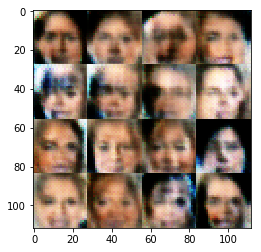

Epoch 1/1... Discriminator Loss: 1.1413... Generator Loss: 1.8913
Epoch 1/1... Discriminator Loss: 0.7605... Generator Loss: 1.2108
Epoch 1/1... Discriminator Loss: 1.4266... Generator Loss: 0.4066
Epoch 1/1... Discriminator Loss: 1.0427... Generator Loss: 1.9633
Epoch 1/1... Discriminator Loss: 0.7798... Generator Loss: 1.4387
Epoch 1/1... Discriminator Loss: 1.2607... Generator Loss: 0.4706
Epoch 1/1... Discriminator Loss: 1.1222... Generator Loss: 1.4479
Epoch 1/1... Discriminator Loss: 0.9788... Generator Loss: 0.7951
Epoch 1/1... Discriminator Loss: 0.9671... Generator Loss: 0.9737
Epoch 1/1... Discriminator Loss: 0.9063... Generator Loss: 1.1827
Epoch 1/1... Discriminator Loss: 1.9595... Generator Loss: 0.1918
Epoch 1/1... Discriminator Loss: 1.1744... Generator Loss: 1.9777
Epoch 1/1... Discriminator Loss: 0.6227... Generator Loss: 2.8663
Epoch 1/1... Discriminator Loss: 0.3675... Generator Loss: 1.7476
Epoch 1/1... Discriminator Loss: 0.8577... Generator Loss: 0.7033
Epoch 1/1.

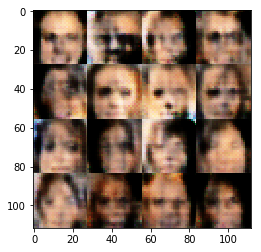

Epoch 1/1... Discriminator Loss: 1.1030... Generator Loss: 0.9557
Epoch 1/1... Discriminator Loss: 1.3381... Generator Loss: 1.1842
Epoch 1/1... Discriminator Loss: 0.8869... Generator Loss: 1.1533
Epoch 1/1... Discriminator Loss: 1.1007... Generator Loss: 0.6557
Epoch 1/1... Discriminator Loss: 1.2167... Generator Loss: 1.5538
Epoch 1/1... Discriminator Loss: 0.8737... Generator Loss: 0.8384
Epoch 1/1... Discriminator Loss: 0.9942... Generator Loss: 0.8111
Epoch 1/1... Discriminator Loss: 1.1360... Generator Loss: 1.5559
Epoch 1/1... Discriminator Loss: 1.6005... Generator Loss: 0.3251
Epoch 1/1... Discriminator Loss: 1.2251... Generator Loss: 1.6466
Epoch 1/1... Discriminator Loss: 1.6350... Generator Loss: 0.2872
Epoch 1/1... Discriminator Loss: 1.2639... Generator Loss: 1.1954
Epoch 1/1... Discriminator Loss: 1.4321... Generator Loss: 0.7325
Epoch 1/1... Discriminator Loss: 1.6100... Generator Loss: 0.4524
Epoch 1/1... Discriminator Loss: 1.1760... Generator Loss: 0.8850
Epoch 1/1.

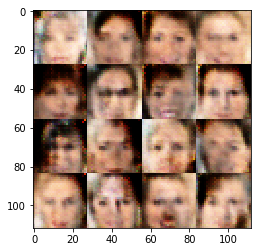

Epoch 1/1... Discriminator Loss: 1.1986... Generator Loss: 1.1176
Epoch 1/1... Discriminator Loss: 1.3050... Generator Loss: 0.5204
Epoch 1/1... Discriminator Loss: 1.3222... Generator Loss: 1.1806
Epoch 1/1... Discriminator Loss: 1.1037... Generator Loss: 0.6373
Epoch 1/1... Discriminator Loss: 0.8321... Generator Loss: 2.0120
Epoch 1/1... Discriminator Loss: 1.8195... Generator Loss: 0.2702
Epoch 1/1... Discriminator Loss: 1.0000... Generator Loss: 0.9012
Epoch 1/1... Discriminator Loss: 1.1091... Generator Loss: 1.6488
Epoch 1/1... Discriminator Loss: 1.2868... Generator Loss: 0.5649
Epoch 1/1... Discriminator Loss: 1.4424... Generator Loss: 1.3251
Epoch 1/1... Discriminator Loss: 0.8229... Generator Loss: 1.2369
Epoch 1/1... Discriminator Loss: 1.2832... Generator Loss: 0.5029
Epoch 1/1... Discriminator Loss: 0.8173... Generator Loss: 1.6327
Epoch 1/1... Discriminator Loss: 1.0458... Generator Loss: 0.7949
Epoch 1/1... Discriminator Loss: 0.8650... Generator Loss: 0.9818
Epoch 1/1.

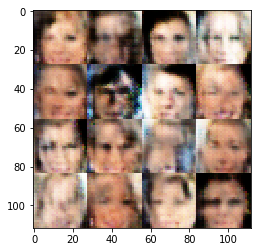

Epoch 1/1... Discriminator Loss: 1.0968... Generator Loss: 0.7916
Epoch 1/1... Discriminator Loss: 1.4115... Generator Loss: 0.6460
Epoch 1/1... Discriminator Loss: 1.3190... Generator Loss: 0.5942
Epoch 1/1... Discriminator Loss: 1.3932... Generator Loss: 0.4903
Epoch 1/1... Discriminator Loss: 2.0762... Generator Loss: 2.5104
Epoch 1/1... Discriminator Loss: 1.9072... Generator Loss: 0.2073
Epoch 1/1... Discriminator Loss: 1.6179... Generator Loss: 1.3023
Epoch 1/1... Discriminator Loss: 1.0396... Generator Loss: 1.2337
Epoch 1/1... Discriminator Loss: 1.1712... Generator Loss: 0.5619
Epoch 1/1... Discriminator Loss: 1.0154... Generator Loss: 0.8410
Epoch 1/1... Discriminator Loss: 1.3431... Generator Loss: 1.6344
Epoch 1/1... Discriminator Loss: 1.3621... Generator Loss: 0.4368
Epoch 1/1... Discriminator Loss: 1.3067... Generator Loss: 0.7521
Epoch 1/1... Discriminator Loss: 1.1795... Generator Loss: 0.7697
Epoch 1/1... Discriminator Loss: 1.3052... Generator Loss: 1.6787
Epoch 1/1.

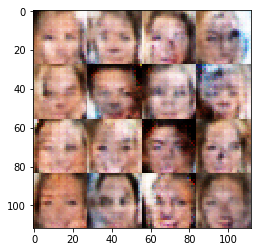

Epoch 1/1... Discriminator Loss: 1.9083... Generator Loss: 0.2689
Epoch 1/1... Discriminator Loss: 0.6894... Generator Loss: 5.4391
Epoch 1/1... Discriminator Loss: 0.4056... Generator Loss: 1.5422
Epoch 1/1... Discriminator Loss: 2.6409... Generator Loss: 0.1050
Epoch 1/1... Discriminator Loss: 5.1992... Generator Loss: 4.3700
Epoch 1/1... Discriminator Loss: 1.2908... Generator Loss: 0.7854
Epoch 1/1... Discriminator Loss: 1.7204... Generator Loss: 0.3017
Epoch 1/1... Discriminator Loss: 1.1234... Generator Loss: 1.3481
Epoch 1/1... Discriminator Loss: 1.0916... Generator Loss: 0.8315
Epoch 1/1... Discriminator Loss: 1.3293... Generator Loss: 0.5915
Epoch 1/1... Discriminator Loss: 1.3335... Generator Loss: 0.8576
Epoch 1/1... Discriminator Loss: 1.2390... Generator Loss: 0.7151
Epoch 1/1... Discriminator Loss: 1.3565... Generator Loss: 0.5063
Epoch 1/1... Discriminator Loss: 1.2911... Generator Loss: 1.2360
Epoch 1/1... Discriminator Loss: 1.1867... Generator Loss: 0.9166
Epoch 1/1.

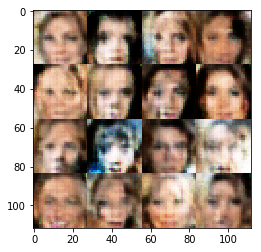

Epoch 1/1... Discriminator Loss: 0.3531... Generator Loss: 2.4113
Epoch 1/1... Discriminator Loss: 0.2808... Generator Loss: 2.6004
Epoch 1/1... Discriminator Loss: 1.6982... Generator Loss: 0.2789
Epoch 1/1... Discriminator Loss: 2.2064... Generator Loss: 2.9774
Epoch 1/1... Discriminator Loss: 1.0033... Generator Loss: 0.6677
Epoch 1/1... Discriminator Loss: 1.0460... Generator Loss: 0.9365
Epoch 1/1... Discriminator Loss: 1.0924... Generator Loss: 1.0761
Epoch 1/1... Discriminator Loss: 0.9556... Generator Loss: 0.8419
Epoch 1/1... Discriminator Loss: 1.1844... Generator Loss: 0.6718
Epoch 1/1... Discriminator Loss: 1.3480... Generator Loss: 0.8473
Epoch 1/1... Discriminator Loss: 1.3911... Generator Loss: 0.5497
Epoch 1/1... Discriminator Loss: 1.3620... Generator Loss: 0.8960
Epoch 1/1... Discriminator Loss: 1.6002... Generator Loss: 0.9461
Epoch 1/1... Discriminator Loss: 1.9705... Generator Loss: 0.1878
Epoch 1/1... Discriminator Loss: 1.1073... Generator Loss: 1.1380
Epoch 1/1.

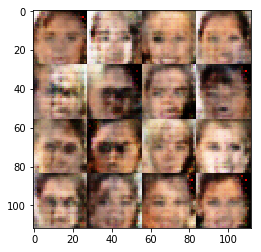

Epoch 1/1... Discriminator Loss: 0.7039... Generator Loss: 1.7323
Epoch 1/1... Discriminator Loss: 0.8576... Generator Loss: 0.9038
Epoch 1/1... Discriminator Loss: 0.8794... Generator Loss: 2.5668
Epoch 1/1... Discriminator Loss: 1.3722... Generator Loss: 0.4059
Epoch 1/1... Discriminator Loss: 1.3076... Generator Loss: 1.0222
Epoch 1/1... Discriminator Loss: 1.5826... Generator Loss: 0.3995
Epoch 1/1... Discriminator Loss: 1.3925... Generator Loss: 0.5285
Epoch 1/1... Discriminator Loss: 1.2572... Generator Loss: 1.0594
Epoch 1/1... Discriminator Loss: 1.3292... Generator Loss: 0.4699
Epoch 1/1... Discriminator Loss: 1.4027... Generator Loss: 0.6827
Epoch 1/1... Discriminator Loss: 1.1019... Generator Loss: 0.8204
Epoch 1/1... Discriminator Loss: 1.3640... Generator Loss: 1.0479
Epoch 1/1... Discriminator Loss: 1.2140... Generator Loss: 0.5054
Epoch 1/1... Discriminator Loss: 1.5693... Generator Loss: 1.6261
Epoch 1/1... Discriminator Loss: 1.3931... Generator Loss: 0.3961
Epoch 1/1.

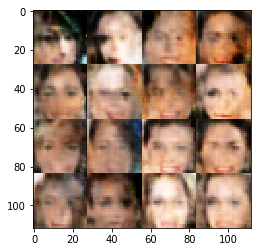

Epoch 1/1... Discriminator Loss: 1.2858... Generator Loss: 0.4712
Epoch 1/1... Discriminator Loss: 1.2478... Generator Loss: 0.8067
Epoch 1/1... Discriminator Loss: 1.2076... Generator Loss: 1.2351
Epoch 1/1... Discriminator Loss: 1.3766... Generator Loss: 0.4641
Epoch 1/1... Discriminator Loss: 1.2409... Generator Loss: 1.0446
Epoch 1/1... Discriminator Loss: 0.8375... Generator Loss: 1.1337
Epoch 1/1... Discriminator Loss: 1.2229... Generator Loss: 0.7994
Epoch 1/1... Discriminator Loss: 0.9839... Generator Loss: 0.8171
Epoch 1/1... Discriminator Loss: 1.0388... Generator Loss: 0.8305
Epoch 1/1... Discriminator Loss: 0.9968... Generator Loss: 0.7567
Epoch 1/1... Discriminator Loss: 1.3904... Generator Loss: 0.7891
Epoch 1/1... Discriminator Loss: 1.2953... Generator Loss: 1.0992
Epoch 1/1... Discriminator Loss: 1.4093... Generator Loss: 0.4129
Epoch 1/1... Discriminator Loss: 1.1398... Generator Loss: 0.6903
Epoch 1/1... Discriminator Loss: 1.1043... Generator Loss: 1.6922
Epoch 1/1.

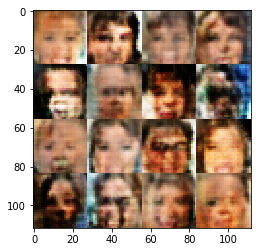

Epoch 1/1... Discriminator Loss: 1.2266... Generator Loss: 0.7709
Epoch 1/1... Discriminator Loss: 1.3319... Generator Loss: 0.5876
Epoch 1/1... Discriminator Loss: 1.1865... Generator Loss: 0.9237
Epoch 1/1... Discriminator Loss: 1.0677... Generator Loss: 0.6795
Epoch 1/1... Discriminator Loss: 1.0020... Generator Loss: 0.8521
Epoch 1/1... Discriminator Loss: 1.0916... Generator Loss: 1.0343
Epoch 1/1... Discriminator Loss: 1.4779... Generator Loss: 0.5748
Epoch 1/1... Discriminator Loss: 1.3211... Generator Loss: 0.7887
Epoch 1/1... Discriminator Loss: 1.5258... Generator Loss: 0.4708
Epoch 1/1... Discriminator Loss: 1.5284... Generator Loss: 0.7411
Epoch 1/1... Discriminator Loss: 1.5953... Generator Loss: 0.3715
Epoch 1/1... Discriminator Loss: 1.6636... Generator Loss: 0.6438
Epoch 1/1... Discriminator Loss: 1.6363... Generator Loss: 0.9295
Epoch 1/1... Discriminator Loss: 1.4611... Generator Loss: 0.5266
Epoch 1/1... Discriminator Loss: 1.4675... Generator Loss: 0.6204
Epoch 1/1.

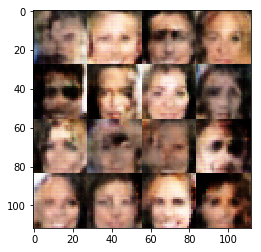

Epoch 1/1... Discriminator Loss: 0.9107... Generator Loss: 0.8683
Epoch 1/1... Discriminator Loss: 1.1791... Generator Loss: 1.1494
Epoch 1/1... Discriminator Loss: 1.6470... Generator Loss: 0.4572
Epoch 1/1... Discriminator Loss: 1.4279... Generator Loss: 0.7916
Epoch 1/1... Discriminator Loss: 1.3274... Generator Loss: 0.4681
Epoch 1/1... Discriminator Loss: 1.6601... Generator Loss: 0.9805
Epoch 1/1... Discriminator Loss: 1.7709... Generator Loss: 0.2721
Epoch 1/1... Discriminator Loss: 1.2600... Generator Loss: 0.5864
Epoch 1/1... Discriminator Loss: 1.5000... Generator Loss: 1.0936
Epoch 1/1... Discriminator Loss: 1.4848... Generator Loss: 0.5583
Epoch 1/1... Discriminator Loss: 1.2813... Generator Loss: 0.6127
Epoch 1/1... Discriminator Loss: 1.3922... Generator Loss: 0.6125
Epoch 1/1... Discriminator Loss: 1.6345... Generator Loss: 1.0815
Epoch 1/1... Discriminator Loss: 1.8258... Generator Loss: 0.2482
Epoch 1/1... Discriminator Loss: 1.3480... Generator Loss: 1.4521
Epoch 1/1.

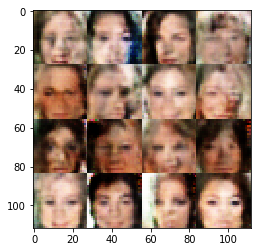

Epoch 1/1... Discriminator Loss: 1.4877... Generator Loss: 0.8681
Epoch 1/1... Discriminator Loss: 1.5236... Generator Loss: 0.4426
Epoch 1/1... Discriminator Loss: 1.5614... Generator Loss: 0.5396
Epoch 1/1... Discriminator Loss: 1.4923... Generator Loss: 0.7987
Epoch 1/1... Discriminator Loss: 1.3790... Generator Loss: 0.5859
Epoch 1/1... Discriminator Loss: 0.8508... Generator Loss: 1.6918
Epoch 1/1... Discriminator Loss: 1.4294... Generator Loss: 0.4277
Epoch 1/1... Discriminator Loss: 1.3479... Generator Loss: 1.3526
Epoch 1/1... Discriminator Loss: 1.6724... Generator Loss: 0.3445
Epoch 1/1... Discriminator Loss: 1.0386... Generator Loss: 0.7261
Epoch 1/1... Discriminator Loss: 1.1147... Generator Loss: 0.8970
Epoch 1/1... Discriminator Loss: 1.0412... Generator Loss: 0.8512
Epoch 1/1... Discriminator Loss: 0.8935... Generator Loss: 2.3230
Epoch 1/1... Discriminator Loss: 1.2814... Generator Loss: 0.5033
Epoch 1/1... Discriminator Loss: 0.6727... Generator Loss: 2.3832
Epoch 1/1.

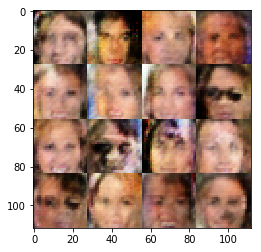

Epoch 1/1... Discriminator Loss: 0.8144... Generator Loss: 1.0279
Epoch 1/1... Discriminator Loss: 1.4920... Generator Loss: 0.5699
Epoch 1/1... Discriminator Loss: 1.3676... Generator Loss: 0.6826
Epoch 1/1... Discriminator Loss: 1.4705... Generator Loss: 0.5294
Epoch 1/1... Discriminator Loss: 0.9739... Generator Loss: 0.8269
Epoch 1/1... Discriminator Loss: 1.0527... Generator Loss: 0.7196
Epoch 1/1... Discriminator Loss: 1.3240... Generator Loss: 0.6804
Epoch 1/1... Discriminator Loss: 1.3858... Generator Loss: 0.5637
Epoch 1/1... Discriminator Loss: 1.1646... Generator Loss: 0.6624
Epoch 1/1... Discriminator Loss: 1.4692... Generator Loss: 0.6536
Epoch 1/1... Discriminator Loss: 1.3324... Generator Loss: 0.6003
Epoch 1/1... Discriminator Loss: 0.9378... Generator Loss: 1.2965
Epoch 1/1... Discriminator Loss: 1.3956... Generator Loss: 0.5673
Epoch 1/1... Discriminator Loss: 1.4530... Generator Loss: 0.5497
Epoch 1/1... Discriminator Loss: 0.8912... Generator Loss: 2.6493
Epoch 1/1.

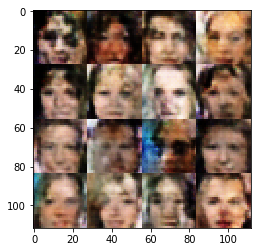

Epoch 1/1... Discriminator Loss: 1.5663... Generator Loss: 0.5448
Epoch 1/1... Discriminator Loss: 1.3334... Generator Loss: 0.6333
Epoch 1/1... Discriminator Loss: 1.2177... Generator Loss: 0.6548
Epoch 1/1... Discriminator Loss: 1.4254... Generator Loss: 0.5706
Epoch 1/1... Discriminator Loss: 1.2235... Generator Loss: 0.7690
Epoch 1/1... Discriminator Loss: 1.2181... Generator Loss: 0.6662
Epoch 1/1... Discriminator Loss: 1.1817... Generator Loss: 0.6460
Epoch 1/1... Discriminator Loss: 1.3732... Generator Loss: 0.6053
Epoch 1/1... Discriminator Loss: 1.2210... Generator Loss: 0.7367
Epoch 1/1... Discriminator Loss: 1.3745... Generator Loss: 0.6308
Epoch 1/1... Discriminator Loss: 1.5818... Generator Loss: 0.4916
Epoch 1/1... Discriminator Loss: 1.5675... Generator Loss: 0.5426
Epoch 1/1... Discriminator Loss: 1.5170... Generator Loss: 0.5282
Epoch 1/1... Discriminator Loss: 1.3781... Generator Loss: 0.5557
Epoch 1/1... Discriminator Loss: 1.2279... Generator Loss: 0.6790
Epoch 1/1.

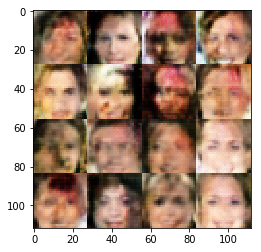

Epoch 1/1... Discriminator Loss: 1.2777... Generator Loss: 0.5919
Epoch 1/1... Discriminator Loss: 1.3280... Generator Loss: 0.7664
Epoch 1/1... Discriminator Loss: 1.1218... Generator Loss: 1.2106
Epoch 1/1... Discriminator Loss: 1.6758... Generator Loss: 0.3037
Epoch 1/1... Discriminator Loss: 1.0720... Generator Loss: 0.8494
Epoch 1/1... Discriminator Loss: 1.2675... Generator Loss: 0.7118
Epoch 1/1... Discriminator Loss: 1.6472... Generator Loss: 0.3921
Epoch 1/1... Discriminator Loss: 1.3058... Generator Loss: 0.5772
Epoch 1/1... Discriminator Loss: 1.5897... Generator Loss: 0.7408
Epoch 1/1... Discriminator Loss: 1.8345... Generator Loss: 0.2891
Epoch 1/1... Discriminator Loss: 1.5906... Generator Loss: 0.4565
Epoch 1/1... Discriminator Loss: 1.3817... Generator Loss: 1.4560
Epoch 1/1... Discriminator Loss: 1.2617... Generator Loss: 0.5622
Epoch 1/1... Discriminator Loss: 1.5940... Generator Loss: 0.4381
Epoch 1/1... Discriminator Loss: 1.3170... Generator Loss: 0.6865
Epoch 1/1.

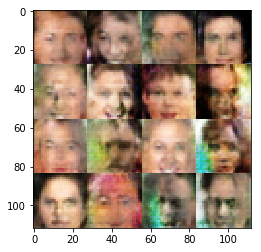

Epoch 1/1... Discriminator Loss: 0.3435... Generator Loss: 4.6762
Epoch 1/1... Discriminator Loss: 0.5800... Generator Loss: 1.1612
Epoch 1/1... Discriminator Loss: 1.1247... Generator Loss: 0.5335
Epoch 1/1... Discriminator Loss: 1.0791... Generator Loss: 2.3789
Epoch 1/1... Discriminator Loss: 1.4329... Generator Loss: 0.4383
Epoch 1/1... Discriminator Loss: 1.1590... Generator Loss: 1.0313
Epoch 1/1... Discriminator Loss: 1.3936... Generator Loss: 0.3810
Epoch 1/1... Discriminator Loss: 1.5096... Generator Loss: 1.4309
Epoch 1/1... Discriminator Loss: 1.4543... Generator Loss: 0.3624
Epoch 1/1... Discriminator Loss: 1.0524... Generator Loss: 0.6093
Epoch 1/1... Discriminator Loss: 1.9727... Generator Loss: 0.9173
Epoch 1/1... Discriminator Loss: 1.4239... Generator Loss: 0.7096
Epoch 1/1... Discriminator Loss: 1.5665... Generator Loss: 0.4563
Epoch 1/1... Discriminator Loss: 1.1538... Generator Loss: 0.6397
Epoch 1/1... Discriminator Loss: 1.5173... Generator Loss: 0.5059
Epoch 1/1.

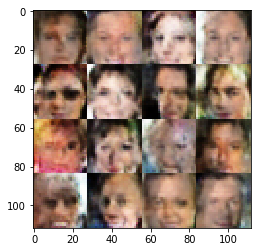

Epoch 1/1... Discriminator Loss: 1.3628... Generator Loss: 0.4711
Epoch 1/1... Discriminator Loss: 1.4091... Generator Loss: 0.5932
Epoch 1/1... Discriminator Loss: 1.4353... Generator Loss: 0.5042
Epoch 1/1... Discriminator Loss: 1.4185... Generator Loss: 0.5856
Epoch 1/1... Discriminator Loss: 1.3159... Generator Loss: 0.7400
Epoch 1/1... Discriminator Loss: 1.4735... Generator Loss: 0.5380
Epoch 1/1... Discriminator Loss: 1.4188... Generator Loss: 0.5125
Epoch 1/1... Discriminator Loss: 1.5295... Generator Loss: 0.6010
Epoch 1/1... Discriminator Loss: 1.4326... Generator Loss: 0.6766
Epoch 1/1... Discriminator Loss: 1.5461... Generator Loss: 0.4765
Epoch 1/1... Discriminator Loss: 1.3471... Generator Loss: 0.6289
Epoch 1/1... Discriminator Loss: 1.5150... Generator Loss: 0.6492
Epoch 1/1... Discriminator Loss: 1.4489... Generator Loss: 0.5699
Epoch 1/1... Discriminator Loss: 1.6410... Generator Loss: 0.4031
Epoch 1/1... Discriminator Loss: 1.7132... Generator Loss: 0.5426
Epoch 1/1.

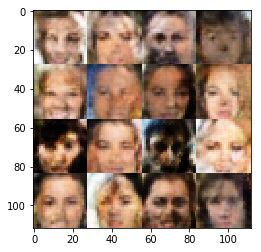

Epoch 1/1... Discriminator Loss: 1.2653... Generator Loss: 0.6962
Epoch 1/1... Discriminator Loss: 1.3478... Generator Loss: 0.6746
Epoch 1/1... Discriminator Loss: 1.4610... Generator Loss: 0.6805
Epoch 1/1... Discriminator Loss: 1.4164... Generator Loss: 0.5783
Epoch 1/1... Discriminator Loss: 1.3149... Generator Loss: 0.5334
Epoch 1/1... Discriminator Loss: 1.4040... Generator Loss: 0.6762
Epoch 1/1... Discriminator Loss: 1.3087... Generator Loss: 0.8601
Epoch 1/1... Discriminator Loss: 1.5243... Generator Loss: 0.5327
Epoch 1/1... Discriminator Loss: 1.2930... Generator Loss: 0.6348
Epoch 1/1... Discriminator Loss: 1.3944... Generator Loss: 0.6243
Epoch 1/1... Discriminator Loss: 1.5297... Generator Loss: 0.6597
Epoch 1/1... Discriminator Loss: 1.3425... Generator Loss: 0.6182
Epoch 1/1... Discriminator Loss: 1.2561... Generator Loss: 0.6235
Epoch 1/1... Discriminator Loss: 1.4364... Generator Loss: 0.6948
Epoch 1/1... Discriminator Loss: 1.2270... Generator Loss: 0.5654
Epoch 1/1.

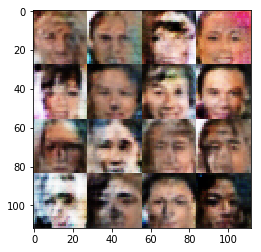

Epoch 1/1... Discriminator Loss: 1.3079... Generator Loss: 0.6882
Epoch 1/1... Discriminator Loss: 1.3703... Generator Loss: 0.5511
Epoch 1/1... Discriminator Loss: 1.4417... Generator Loss: 0.5867
Epoch 1/1... Discriminator Loss: 1.3964... Generator Loss: 0.6563
Epoch 1/1... Discriminator Loss: 1.4608... Generator Loss: 0.6165
Epoch 1/1... Discriminator Loss: 1.3440... Generator Loss: 0.7180
Epoch 1/1... Discriminator Loss: 1.4159... Generator Loss: 0.5540
Epoch 1/1... Discriminator Loss: 1.2649... Generator Loss: 0.5977
Epoch 1/1... Discriminator Loss: 1.5259... Generator Loss: 0.6299
Epoch 1/1... Discriminator Loss: 1.3171... Generator Loss: 0.6756
Epoch 1/1... Discriminator Loss: 1.3325... Generator Loss: 0.6032
Epoch 1/1... Discriminator Loss: 1.5142... Generator Loss: 0.4691
Epoch 1/1... Discriminator Loss: 1.4180... Generator Loss: 0.7004
Epoch 1/1... Discriminator Loss: 1.5136... Generator Loss: 0.5393
Epoch 1/1... Discriminator Loss: 1.3900... Generator Loss: 0.6013
Epoch 1/1.

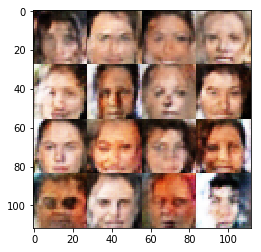

Epoch 1/1... Discriminator Loss: 1.3119... Generator Loss: 1.1477
Epoch 1/1... Discriminator Loss: 0.8578... Generator Loss: 1.5847
Epoch 1/1... Discriminator Loss: 2.0872... Generator Loss: 0.2128
Epoch 1/1... Discriminator Loss: 1.4218... Generator Loss: 0.8780
Epoch 1/1... Discriminator Loss: 1.1712... Generator Loss: 0.9849
Epoch 1/1... Discriminator Loss: 1.3660... Generator Loss: 0.5278
Epoch 1/1... Discriminator Loss: 1.1084... Generator Loss: 0.7577
Epoch 1/1... Discriminator Loss: 1.1025... Generator Loss: 0.8603
Epoch 1/1... Discriminator Loss: 1.3077... Generator Loss: 0.6477
Epoch 1/1... Discriminator Loss: 1.5257... Generator Loss: 0.7245
Epoch 1/1... Discriminator Loss: 1.6404... Generator Loss: 0.5003
Epoch 1/1... Discriminator Loss: 1.5101... Generator Loss: 0.4781
Epoch 1/1... Discriminator Loss: 1.5453... Generator Loss: 0.9617
Epoch 1/1... Discriminator Loss: 1.5573... Generator Loss: 0.4570
Epoch 1/1... Discriminator Loss: 1.3161... Generator Loss: 0.6408
Epoch 1/1.

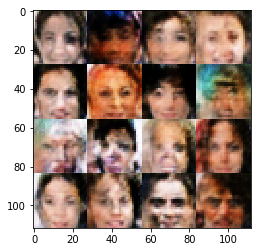

Epoch 1/1... Discriminator Loss: 1.3387... Generator Loss: 0.7290
Epoch 1/1... Discriminator Loss: 1.3260... Generator Loss: 0.5992
Epoch 1/1... Discriminator Loss: 1.5342... Generator Loss: 0.5725
Epoch 1/1... Discriminator Loss: 1.3449... Generator Loss: 0.5452
Epoch 1/1... Discriminator Loss: 1.3199... Generator Loss: 0.6068
Epoch 1/1... Discriminator Loss: 1.2905... Generator Loss: 0.6528
Epoch 1/1... Discriminator Loss: 1.2678... Generator Loss: 0.7371
Epoch 1/1... Discriminator Loss: 1.4862... Generator Loss: 0.7196
Epoch 1/1... Discriminator Loss: 1.2592... Generator Loss: 0.6719
Epoch 1/1... Discriminator Loss: 1.6019... Generator Loss: 0.5043
Epoch 1/1... Discriminator Loss: 1.5809... Generator Loss: 0.6995
Epoch 1/1... Discriminator Loss: 1.4932... Generator Loss: 0.6217
Epoch 1/1... Discriminator Loss: 1.6292... Generator Loss: 0.4323
Epoch 1/1... Discriminator Loss: 1.4161... Generator Loss: 0.6313
Epoch 1/1... Discriminator Loss: 1.4277... Generator Loss: 0.5555
Epoch 1/1.

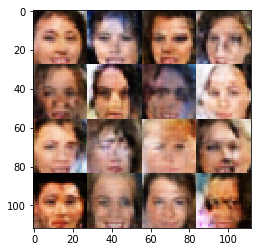

Epoch 1/1... Discriminator Loss: 1.0535... Generator Loss: 1.1328
Epoch 1/1... Discriminator Loss: 0.6325... Generator Loss: 2.0799
Epoch 1/1... Discriminator Loss: 1.7752... Generator Loss: 0.3151
Epoch 1/1... Discriminator Loss: 1.1170... Generator Loss: 3.0073
Epoch 1/1... Discriminator Loss: 1.6431... Generator Loss: 0.3044
Epoch 1/1... Discriminator Loss: 1.4754... Generator Loss: 2.9046
Epoch 1/1... Discriminator Loss: 1.9813... Generator Loss: 0.2245
Epoch 1/1... Discriminator Loss: 1.1153... Generator Loss: 0.7189
Epoch 1/1... Discriminator Loss: 1.2466... Generator Loss: 0.8047
Epoch 1/1... Discriminator Loss: 1.4159... Generator Loss: 0.4441
Epoch 1/1... Discriminator Loss: 1.4337... Generator Loss: 0.7587
Epoch 1/1... Discriminator Loss: 1.3793... Generator Loss: 0.4639
Epoch 1/1... Discriminator Loss: 1.0781... Generator Loss: 0.8697
Epoch 1/1... Discriminator Loss: 1.5095... Generator Loss: 0.4543
Epoch 1/1... Discriminator Loss: 1.3260... Generator Loss: 0.5196
Epoch 1/1.

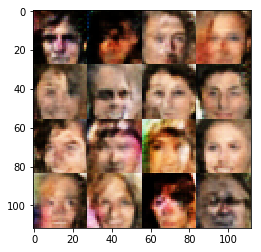

Epoch 1/1... Discriminator Loss: 1.7412... Generator Loss: 0.2768
Epoch 1/1... Discriminator Loss: 1.6326... Generator Loss: 0.7661
Epoch 1/1... Discriminator Loss: 1.5947... Generator Loss: 0.3940
Epoch 1/1... Discriminator Loss: 1.0543... Generator Loss: 0.7438
Epoch 1/1... Discriminator Loss: 1.3202... Generator Loss: 0.9256
Epoch 1/1... Discriminator Loss: 1.3538... Generator Loss: 0.4867
Epoch 1/1... Discriminator Loss: 1.4088... Generator Loss: 0.5456
Epoch 1/1... Discriminator Loss: 1.4494... Generator Loss: 0.7563
Epoch 1/1... Discriminator Loss: 1.5080... Generator Loss: 0.5497
Epoch 1/1... Discriminator Loss: 1.5980... Generator Loss: 0.4140
Epoch 1/1... Discriminator Loss: 1.5845... Generator Loss: 0.6381
Epoch 1/1... Discriminator Loss: 1.5097... Generator Loss: 0.6434
Epoch 1/1... Discriminator Loss: 1.5208... Generator Loss: 0.4629
Epoch 1/1... Discriminator Loss: 1.5682... Generator Loss: 0.5643
Epoch 1/1... Discriminator Loss: 1.6017... Generator Loss: 0.3739
Epoch 1/1.

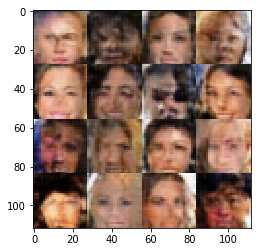

Epoch 1/1... Discriminator Loss: 0.7614... Generator Loss: 2.6184
Epoch 1/1... Discriminator Loss: 1.7732... Generator Loss: 0.2731
Epoch 1/1... Discriminator Loss: 2.2006... Generator Loss: 2.1931
Epoch 1/1... Discriminator Loss: 1.7962... Generator Loss: 0.2507
Epoch 1/1... Discriminator Loss: 1.7297... Generator Loss: 0.9055
Epoch 1/1... Discriminator Loss: 1.2093... Generator Loss: 0.6600
Epoch 1/1... Discriminator Loss: 1.5305... Generator Loss: 0.4741
Epoch 1/1... Discriminator Loss: 1.4555... Generator Loss: 0.6581
Epoch 1/1... Discriminator Loss: 1.5006... Generator Loss: 0.6175
Epoch 1/1... Discriminator Loss: 1.0320... Generator Loss: 0.8418
Epoch 1/1... Discriminator Loss: 1.5123... Generator Loss: 0.4798
Epoch 1/1... Discriminator Loss: 1.5039... Generator Loss: 0.6409
Epoch 1/1... Discriminator Loss: 1.4505... Generator Loss: 0.4707
Epoch 1/1... Discriminator Loss: 1.4443... Generator Loss: 0.6786
Epoch 1/1... Discriminator Loss: 1.3936... Generator Loss: 0.6788
Epoch 1/1.

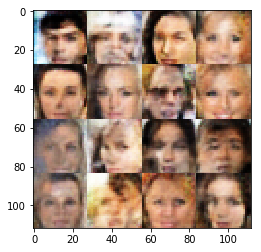

Epoch 1/1... Discriminator Loss: 1.4467... Generator Loss: 0.5335
Epoch 1/1... Discriminator Loss: 1.4151... Generator Loss: 0.6396
Epoch 1/1... Discriminator Loss: 1.2898... Generator Loss: 0.6456
Epoch 1/1... Discriminator Loss: 1.4745... Generator Loss: 0.4696
Epoch 1/1... Discriminator Loss: 1.2900... Generator Loss: 0.7142
Epoch 1/1... Discriminator Loss: 1.5525... Generator Loss: 0.7037
Epoch 1/1... Discriminator Loss: 1.5481... Generator Loss: 0.4709
Epoch 1/1... Discriminator Loss: 1.3757... Generator Loss: 0.5510
Epoch 1/1... Discriminator Loss: 1.5442... Generator Loss: 0.5008
Epoch 1/1... Discriminator Loss: 1.4289... Generator Loss: 0.5503
Epoch 1/1... Discriminator Loss: 1.4922... Generator Loss: 0.8086
Epoch 1/1... Discriminator Loss: 1.6298... Generator Loss: 0.3652
Epoch 1/1... Discriminator Loss: 1.3821... Generator Loss: 0.7625
Epoch 1/1... Discriminator Loss: 1.3503... Generator Loss: 0.6854
Epoch 1/1... Discriminator Loss: 1.4674... Generator Loss: 0.5038
Epoch 1/1.

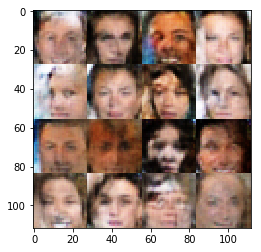

Epoch 1/1... Discriminator Loss: 1.0485... Generator Loss: 0.7884
Epoch 1/1... Discriminator Loss: 1.1350... Generator Loss: 0.6354
Epoch 1/1... Discriminator Loss: 0.8348... Generator Loss: 1.3249
Epoch 1/1... Discriminator Loss: 1.1230... Generator Loss: 0.6116
Epoch 1/1... Discriminator Loss: 1.1949... Generator Loss: 0.8433
Epoch 1/1... Discriminator Loss: 1.2890... Generator Loss: 0.6170
Epoch 1/1... Discriminator Loss: 0.8581... Generator Loss: 1.5618
Epoch 1/1... Discriminator Loss: 1.4952... Generator Loss: 0.4088
Epoch 1/1... Discriminator Loss: 1.3379... Generator Loss: 1.5300
Epoch 1/1... Discriminator Loss: 1.7478... Generator Loss: 0.2490
Epoch 1/1... Discriminator Loss: 1.4339... Generator Loss: 0.8052
Epoch 1/1... Discriminator Loss: 1.3437... Generator Loss: 0.8232
Epoch 1/1... Discriminator Loss: 1.3282... Generator Loss: 0.6653
Epoch 1/1... Discriminator Loss: 1.4746... Generator Loss: 0.4673
Epoch 1/1... Discriminator Loss: 1.4947... Generator Loss: 0.6049
Epoch 1/1.

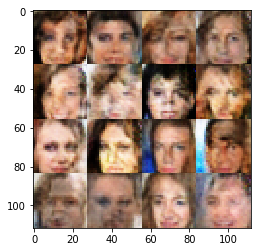

Epoch 1/1... Discriminator Loss: 1.4931... Generator Loss: 0.5346
Epoch 1/1... Discriminator Loss: 1.5906... Generator Loss: 0.5472
Epoch 1/1... Discriminator Loss: 1.5875... Generator Loss: 0.4614
Epoch 1/1... Discriminator Loss: 1.5481... Generator Loss: 0.4733
Epoch 1/1... Discriminator Loss: 1.4293... Generator Loss: 0.6601
Epoch 1/1... Discriminator Loss: 1.4162... Generator Loss: 0.5719
Epoch 1/1... Discriminator Loss: 1.5686... Generator Loss: 0.5316
Epoch 1/1... Discriminator Loss: 1.3777... Generator Loss: 0.6692
Epoch 1/1... Discriminator Loss: 1.3688... Generator Loss: 0.4479
Epoch 1/1... Discriminator Loss: 1.6137... Generator Loss: 1.2244
Epoch 1/1... Discriminator Loss: 1.7820... Generator Loss: 0.2743
Epoch 1/1... Discriminator Loss: 1.3623... Generator Loss: 0.8248
Epoch 1/1... Discriminator Loss: 1.4870... Generator Loss: 0.4895
Epoch 1/1... Discriminator Loss: 1.5618... Generator Loss: 0.6575
Epoch 1/1... Discriminator Loss: 1.3581... Generator Loss: 0.9904
Epoch 1/1.

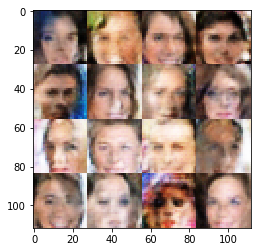

Epoch 1/1... Discriminator Loss: 1.6009... Generator Loss: 0.3367
Epoch 1/1... Discriminator Loss: 1.3381... Generator Loss: 0.6399
Epoch 1/1... Discriminator Loss: 1.2493... Generator Loss: 0.8323
Epoch 1/1... Discriminator Loss: 0.8766... Generator Loss: 1.1218
Epoch 1/1... Discriminator Loss: 1.3950... Generator Loss: 0.4355
Epoch 1/1... Discriminator Loss: 1.0125... Generator Loss: 1.3481
Epoch 1/1... Discriminator Loss: 0.4055... Generator Loss: 2.9739
Epoch 1/1... Discriminator Loss: 2.0849... Generator Loss: 0.1777
Epoch 1/1... Discriminator Loss: 1.2561... Generator Loss: 0.9147
Epoch 1/1... Discriminator Loss: 1.4888... Generator Loss: 0.5259
Epoch 1/1... Discriminator Loss: 1.3870... Generator Loss: 0.5734
Epoch 1/1... Discriminator Loss: 1.1871... Generator Loss: 0.6130
Epoch 1/1... Discriminator Loss: 1.3712... Generator Loss: 0.8923
Epoch 1/1... Discriminator Loss: 1.5177... Generator Loss: 0.4932
Epoch 1/1... Discriminator Loss: 1.6948... Generator Loss: 0.4373
Epoch 1/1.

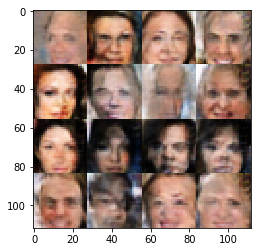

Epoch 1/1... Discriminator Loss: 1.3182... Generator Loss: 0.9190
Epoch 1/1... Discriminator Loss: 1.2813... Generator Loss: 0.6120
Epoch 1/1... Discriminator Loss: 0.9206... Generator Loss: 1.3336
Epoch 1/1... Discriminator Loss: 1.9629... Generator Loss: 0.2112
Epoch 1/1... Discriminator Loss: 1.6843... Generator Loss: 1.3953
Epoch 1/1... Discriminator Loss: 1.4593... Generator Loss: 0.5299
Epoch 1/1... Discriminator Loss: 1.3132... Generator Loss: 0.5563
Epoch 1/1... Discriminator Loss: 1.7344... Generator Loss: 0.4822
Epoch 1/1... Discriminator Loss: 1.4487... Generator Loss: 0.6935
Epoch 1/1... Discriminator Loss: 1.5023... Generator Loss: 0.5855
Epoch 1/1... Discriminator Loss: 1.2979... Generator Loss: 0.7249
Epoch 1/1... Discriminator Loss: 1.4683... Generator Loss: 0.4916
Epoch 1/1... Discriminator Loss: 1.4985... Generator Loss: 0.6346
Epoch 1/1... Discriminator Loss: 1.4177... Generator Loss: 0.4906
Epoch 1/1... Discriminator Loss: 1.2719... Generator Loss: 0.7498
Epoch 1/1.

In [39]:
batch_size = 64
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.